In [1]:
import torch

In [3]:
N=1000

In [4]:
n=3

In [206]:
K = torch.rand((n,n))

In [207]:
K

tensor([[[0.0259, 0.8430, 0.3490],
         [0.8319, 0.6743, 0.2922],
         [0.3694, 0.8778, 0.2836]],

        [[0.7222, 0.0616, 0.3046],
         [0.3728, 0.3091, 0.7694],
         [0.5795, 0.7590, 0.7665]],

        [[0.5858, 0.1992, 0.4473],
         [0.2207, 0.7964, 0.7126],
         [0.9208, 0.3550, 0.5185]],

        ...,

        [[0.6413, 0.4557, 0.5922],
         [0.3309, 0.5002, 0.0212],
         [0.7029, 0.9147, 0.5159]],

        [[0.7507, 0.1243, 0.9205],
         [0.5758, 0.7599, 0.4539],
         [0.7339, 0.4308, 0.9618]],

        [[0.4144, 0.7079, 0.6145],
         [0.1080, 0.0168, 0.5613],
         [0.4877, 0.7841, 0.5179]]])

In [208]:
torch.amax(K, axis=1)

tensor([[0.8319, 0.8778, 0.3490],
        [0.7222, 0.7590, 0.7694],
        [0.9208, 0.7964, 0.7126],
        ...,
        [0.7029, 0.9147, 0.5922],
        [0.7507, 0.7599, 0.9618],
        [0.4877, 0.7841, 0.6145]])

In [240]:
roworder = torch.argsort(torch.amax(K, axis=1), descending=True)
indices_1 = torch.einsum('Ni,j->Nij', roworder, torch.arange(n)).flatten()
print(indices_1.shape)
P_row = torch.zeros((N*n*n))
P_row[indices_1] = 1
P_row = P_row.reshape((N,n,n))
print(P_row)

torch.Size([900])
tensor([[[1., 1., 1.],
         [1., 1., 0.],
         [1., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0.,

In [210]:
colorder = torch.argsort(torch.amax(K, axis=0), descending=True)
print(colorder)
P_col = torch.zeros((n,n))
P_col[torch.arange(n).view(N,n,n),colorder.view(N,n,n)] = 1
print(P_col)

tensor([1, 2, 0])


RuntimeError: shape '[1000, 3, 3]' is invalid for input of size 3

In [198]:
P_row@K

tensor([[0.7571, 0.9583, 0.2419],
        [0.5151, 0.8944, 0.4275],
        [0.7040, 0.0754, 0.2672]])

In [199]:
K@P_col

tensor([[0.0754, 0.7040, 0.2672],
        [0.9583, 0.7571, 0.2419],
        [0.8944, 0.5151, 0.4275]])

In [124]:
import matplotlib.pyplot as plt

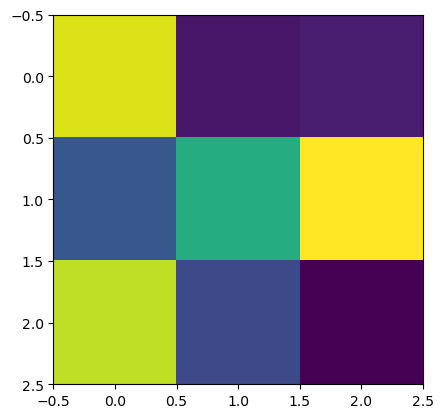

In [125]:
plt.imshow(K)

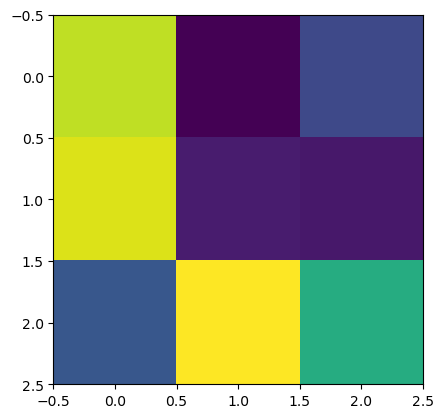

In [126]:
plt.imshow(P_row@K@P_col)

In [31]:
import torch

# Assuming you have a batch of matrices K with shape (1000, 64, 64)
batch_size = 1000
matrix_size = 64

# Generate sample data (replace this with your actual data)
K = torch.randn(batch_size, matrix_size, matrix_size)

# Calculate row-wise averages across each matrix in the batch
row_averages = K.mean(dim=2)  # Shape: (1000, 64)

# Calculate column-wise averages across each matrix in the batch
column_averages = K.mean(dim=1)  # Shape: (1000, 64)

# Find the permutation indices that sort rows based on decreasing average values
sorted_row_indices = torch.argsort(row_averages, dim=1, descending=True)

# Find the permutation indices that sort columns based on decreasing average values
sorted_column_indices = torch.argsort(column_averages, dim=1, descending=True)

# Create row permutation matrices using advanced indexing
row_permutation_matrices = torch.zeros(batch_size, matrix_size, matrix_size)
row_permutation_matrices[torch.arange(batch_size).unsqueeze(1), torch.arange(matrix_size), sorted_row_indices] = 1

# Create column permutation matrices using advanced indexing
column_permutation_matrices = torch.zeros(batch_size, matrix_size, matrix_size)
column_permutation_matrices[torch.arange(batch_size).unsqueeze(1), sorted_column_indices, torch.arange(matrix_size)] = 1

# Apply row permutation matrices to sort rows
sorted_by_rows_K = torch.matmul(row_permutation_matrices, K)

# Apply column permutation matrices to sort columns
sorted_K = torch.matmul(sorted_by_rows_K, column_permutation_matrices.transpose(1, 2))

# `sorted_K` now contains matrices in `K` with both rows and columns sorted
# based on their respective average values

# Optionally, you can visualize the effect of permutation on a single matrix from the batch
# For example, to see the effect on the first matrix in the batch:
original_matrix = K[0]
sorted_matrix = sorted_K[0]

# Print or inspect the original and sorted matrices
print("Original Matrix:")
print(original_matrix)
print("\nSorted Matrix:")
print(sorted_matrix)


Original Matrix:
tensor([[ 1.3666,  0.1016,  1.0729,  ..., -0.3588,  0.2901, -0.6517],
        [-0.0707,  1.3093, -0.5727,  ..., -1.8788, -0.7926, -1.0035],
        [ 0.3400, -1.0965, -1.0402,  ..., -0.5093, -3.0858,  1.2810],
        ...,
        [ 0.7735,  1.1145,  1.6351,  ..., -0.4797, -0.4811,  0.7814],
        [-1.0138, -0.7291, -1.4138,  ...,  0.4572,  0.8480,  0.3589],
        [ 0.2776,  0.0551,  1.7818,  ...,  0.1782,  0.1130,  0.5244]])

Sorted Matrix:
tensor([[-5.3352e-01,  1.8471e+00,  1.0122e+00,  ..., -5.0269e-01,
          4.9349e-01, -1.0178e+00],
        [ 3.8431e-01, -3.4492e-01,  4.6163e-01,  ...,  1.0976e+00,
         -1.0878e+00, -5.2339e-01],
        [ 8.5673e-01,  9.7873e-01,  6.0598e-01,  ...,  6.9622e-01,
          2.6015e-02, -1.5367e+00],
        ...,
        [-5.2985e-01, -9.2846e-01, -2.9271e+00,  ..., -8.3959e-01,
          8.6407e-01,  1.5542e-03],
        [-7.1095e-01, -7.0494e-01, -1.2627e+00,  ...,  4.1899e-01,
          5.8667e-01,  4.1926e-02],
     

In [33]:
sorted_matrix.mean(axis=0)

tensor([ 0.0180,  0.1493,  0.0564, -0.0685,  0.1621,  0.0088,  0.1316, -0.1060,
         0.1071, -0.0041,  0.0195, -0.1396, -0.2281,  0.1012, -0.1969,  0.0636,
         0.2043,  0.3857, -0.1329, -0.0927, -0.0216, -0.0895,  0.1252,  0.0557,
         0.0031, -0.0611, -0.1859, -0.2051, -0.0979, -0.0869, -0.1469, -0.1537,
         0.2530,  0.2547, -0.1317, -0.0467,  0.1438, -0.0318, -0.2182,  0.1807,
        -0.3919,  0.0220, -0.1657,  0.2302, -0.0570,  0.0735, -0.0920, -0.0027,
        -0.0872, -0.0642, -0.0296, -0.1086, -0.1388,  0.1059, -0.0418, -0.0165,
        -0.0575,  0.0606, -0.0344, -0.1242,  0.0447, -0.0757, -0.0722, -0.0651])

In [44]:
sorted_by_rows_K[0].mean(axis=1)

tensor([-0.6249,  0.2451,  0.2747,  1.0852])

In [68]:
import numpy as np

class PermutationMatrixBatch:
    def __init__(self, matrices):
        """
        Initialize with a batch of matrices.
        
        :param matrices: numpy array of shape (N_m, N, N)
        """
        self.matrices = matrices

    def l2_norms(self, matrices):
        """
        Calculate the L2 norms of the rows and columns of the matrices.
        
        :param matrices: numpy array of shape (N_m, N, N)
        :return: tuple of numpy arrays (row_norms, col_norms) each of shape (N_m, N)
        """
        row_norms = np.linalg.norm(matrices, axis=2)
        col_norms = np.linalg.norm(matrices, axis=1)
        return row_norms, col_norms

    def permutation_indices(self, norms):
        """
        Get the permutation indices that sort the norms in descending order.
        
        :param norms: numpy array of shape (N_m, N)
        :return: numpy array of shape (N_m, N)
        """
        return np.argsort(-norms, axis=1)

    def permutation_matrices(self, indices):
        """
        Create permutation matrices from permutation indices.
        
        :param indices: numpy array of shape (N_m, N)
        :return: numpy array of shape (N_m, N, N)
        """
        N_m, N = indices.shape
        perm_matrices = np.zeros((N_m, N, N), dtype=int)
        for i in range(N_m):
            perm_matrices[i, np.arange(N), indices[i]] = 1
        return perm_matrices

    def get_permutation_matrices(self):
        """
        Get the permutation matrices for sorting rows and columns.
        
        :return: tuple of numpy arrays (row_perm_matrices, col_perm_matrices) each of shape (N_m, N, N)
        """
        row_norms, col_norms = self.l2_norms(self.matrices)
        row_indices = self.permutation_indices(row_norms)
        col_indices = self.permutation_indices(col_norms)
        row_perm_matrices = self.permutation_matrices(row_indices)
        col_perm_matrices = self.permutation_matrices(col_indices)
        return row_perm_matrices, col_perm_matrices


N_m = 1
N = 1000
matrices = np.random.rand(N_m, N, N)
perm_matrix_batch = PermutationMatrixBatch(matrices)
row_perm_matrices, col_perm_matrices = perm_matrix_batch.get_permutation_matrices()
print("Row Permutation Matrices:\n", row_perm_matrices)
print("Column Permutation Matrices:\n", col_perm_matrices)


Row Permutation Matrices:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Column Permutation Matrices:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [48]:
matrices

array([[[0.9753355 , 0.31272499, 0.50041552],
        [0.96108219, 0.0185246 , 0.14101278],
        [0.22663391, 0.79621544, 0.27849208]],

       [[0.94407354, 0.80342996, 0.56488375],
        [0.97543997, 0.05962159, 0.12713152],
        [0.02332079, 0.43006589, 0.26899396]],

       [[0.08946639, 0.20128036, 0.24712223],
        [0.15762731, 0.29466181, 0.27540715],
        [0.3422158 , 0.27987005, 0.11140774]],

       [[0.76054535, 0.54297159, 0.63130092],
        [0.68785892, 0.92560716, 0.55764614],
        [0.65169815, 0.78042514, 0.858068  ]],

       [[0.77819699, 0.53379242, 0.90019818],
        [0.50378881, 0.46256253, 0.62157252],
        [0.94617232, 0.36123088, 0.11041425]],

       [[0.90616458, 0.20694824, 0.80666654],
        [0.46209062, 0.66273554, 0.5686501 ],
        [0.24102305, 0.83134489, 0.98720761]],

       [[0.04575153, 0.00197954, 0.30177311],
        [0.74206713, 0.86120303, 0.10203729],
        [0.05171711, 0.51130454, 0.13759867]],

       [[0.98941873,

In [49]:
permuted_matrices = row_perm_matrices@matrices@col_perm_matrices

In [60]:
row_perm_matrices[1].T@permuted_matrices[1]@col_perm_matrices[1].T == matrices[1]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

array([[1.46913228, 1.11353315, 1.02727506]])